In [1]:
# import package
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# loading Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', device='cpu')  
# my notebook don't have GPU

Using cache found in C:\Users\gmluo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-7 Python-3.11.7 torch-2.2.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
# download image from internet
torch.hub.download_url_to_file('https://buddhability.org/wp-content/uploads/2021/06/GettyImages-640256401.jpg', 'baggio.jpg')
torch.hub.download_url_to_file('https://www.si.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTk5Njg1NTg5Njg2MDM1NTU5/usatsi_20639857_168390270_lowres.jpg', 'curry.jpg')

100%|██████████| 120k/120k [00:00<00:00, 377kB/s] 
100%|██████████| 166k/166k [00:00<00:00, 1.13MB/s]


In [4]:
# case 1 baggio

In [5]:
# open image 
im1 = Image.open('baggio.jpg')  
# resize
im1 = im1.resize((im1.size[0]//2, im1.size[1]//2))

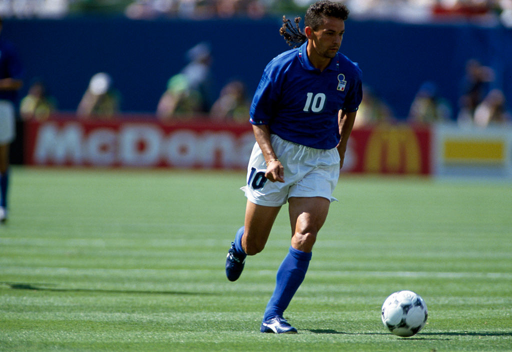

In [6]:
im1

In [7]:
# Inference
im1_yolo = model(im1)
# Results
im1_yolo.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,218.704803,4.897437,364.187622,335.392639,0.924962,0,person
1,380.631744,288.990417,429.132568,338.469482,0.920177,32,sports ball
2,75.909973,71.809425,122.461143,116.855637,0.611630,0,person
3,457.494049,57.844933,496.307800,125.751831,0.587997,0,person
4,208.040680,80.911545,249.190277,123.057571,0.545441,0,person
5,158.623871,40.906258,218.129303,119.706741,0.519355,0,person
6,20.027622,78.363754,58.178699,145.428711,0.471878,0,person
7,406.303070,78.917603,448.310608,167.873749,0.369909,0,person
8,0.163996,91.228523,17.829617,220.672119,0.326742,0,person
9,474.545349,89.277039,508.881500,127.482384,0.306893,0,person


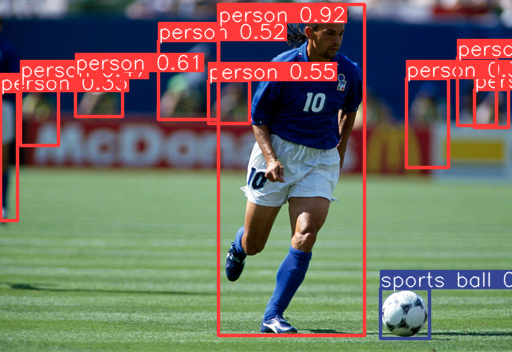

In [8]:
im1_yolo.show()
# we can see I get too many nonsense, so I need to adjust ylo's parameters.

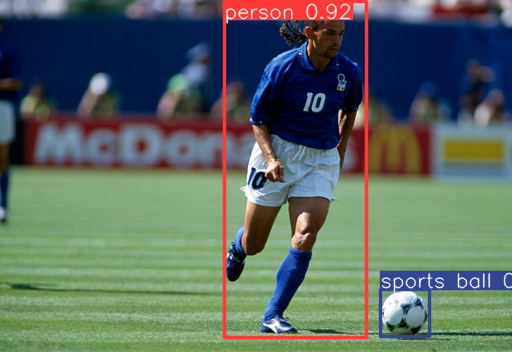

In [15]:
model.conf = 0.75  # NMS confidence threshold
# iou = 0.45  # NMS IoU threshold
# agnostic = False  # NMS class-agnostic
# multi_label = False  # NMS multiple labels per box
classes = [0,37]  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
# max_det = 1000  # maximum number of detections per image
# amp = False  # Automatic Mixed Precision (AMP) inference

im1_yolo_adjust = model(im1, size=320)  # custom inference size
im1_yolo_adjust.show()

In [16]:
# case 2 curry
im2 = Image.open('curry.jpg')  
im2 = im2.resize((im2.size[0]//3, im2.size[1]//3))

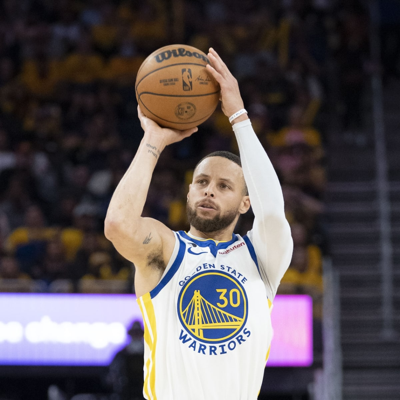

In [17]:
im2

In [18]:
# reloading Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')# Inference
results2 = model(im2)
# Results
results2.pandas().xyxy[0]  # img1 predictions (pandas)

Using cache found in C:\Users\gmluo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-7 Python-3.11.7 torch-2.2.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,135.248199,44.124725,219.167160,131.532440,0.714443,32,sports ball
1,134.387772,44.427773,219.782791,131.408752,0.580912,29,frisbee
2,0.000000,288.631012,143.553268,395.983917,0.569706,62,tv
3,96.764221,51.611919,296.514923,400.000000,0.527853,0,person


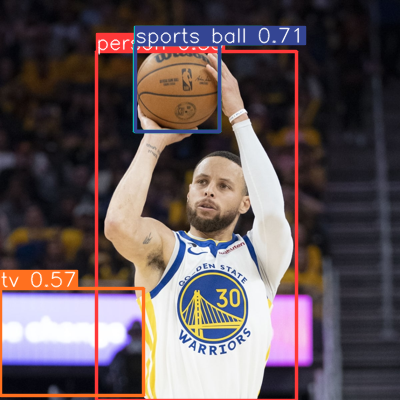

In [13]:
results2.show()
# this case is better than case 1, but I still want to delete tv

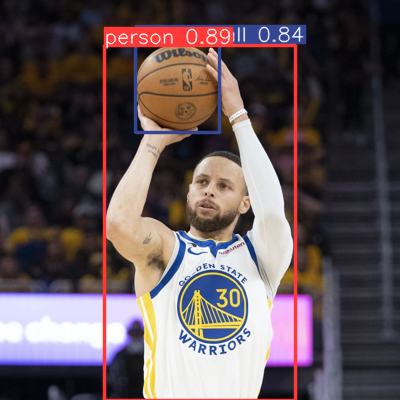

In [19]:
model.conf = 0.75  # NMS confidence threshold
# iou = 0.45  # NMS IoU threshold
# agnostic = False  # NMS class-agnostic
# multi_label = False  # NMS multiple labels per box
classes = [0,37]   # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
# max_det = 1000  # maximum number of detections per image
# amp = False  # Automatic Mixed Precision (AMP) inference

results2_customization = model(im2, size=320)  # custom inference size
results2_customization.show()

In [20]:
# the result is good.
# I get the ball and the main character.